### 영화 평점 분석
- 영화 평점 정보를 크롤링하여 평점의 변화에 대한 시각화 분석을 진행
    - 영화 평점 정보 크롤링
    - 정형데이터로 정리 
    - 평점을 이용한 시각화

In [1]:
#필요 패키지 import
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.parse import urljoin,quote
import urllib
from tqdm import tqdm_notebook


In [ ]:
# https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220726
# https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220725

In [9]:
# URL 생성
url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220727'
url = url_base + url_sub
url

'https://movie.naver.com//movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220727'

In [10]:
# 두개의 url을 결합해주는 함수 - url형식을 체크
url = urljoin(url_base,url_sub)
url

'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&tg=0&date=20220727'

In [11]:
# 페이지 요청
html = urlopen(url)
# 파싱객체 생성
soup = BeautifulSoup(html,'html.parser')

In [12]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;tg=0&amp;date=20220727" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article

In [21]:
# 특정일의 영화 랭킹(평점순) 페이지에서 1위부터 최대랭킹 순위까지의 영화 title 추출
soup.findAll('div',{'class':'tit5'})
len(soup.findAll('div',{'class':'tit5'}))
soup.findAll('div',{'class':'tit5'})[0].text.replace('\n','')
# tag  객체의 내부 태그 접근시 . 연산자 사용 가능
soup.findAll('div',{'class':'tit5'})[0].a['href']
soup.findAll('div',{'class':'tit5'})[0].a.text

'탑건: 매버릭'

In [22]:
# 내포 for문을 활용한 영화 타이틀 추출 
movie_name = [s.a.text for s in soup.findAll('div',{'class':'tit5'})]
movie_name

['탑건: 매버릭',
 '명탐정 코난: 할로윈의 신부',
 '범죄도시2',
 '극장판 주술회전 0',
 '내 사랑',
 '코다',
 '카시오페아',
 '위대한 침묵',
 '올드보이',
 '디어 헌터',
 '중경삼림',
 '엘비스',
 '천로역정: 천국을 찾아서',
 '한산: 용의 출현',
 '펄프 픽션',
 '대니 콜린스',
 '헤어질 결심',
 '그레이 맨',
 '드라이브 마이 카',
 '큐어',
 '신은 죽지 않았다 3: 어둠 속의 빛',
 '우연과 상상',
 '애프터 양',
 '더 킬러: 죽어도 되는 아이',
 '미니언즈2',
 '아이 엠 러브',
 '홀리 모터스',
 '외계+인 1부',
 '그대가 조국',
 '마녀(魔女) Part2. The Other One',
 '토르: 러브 앤 썬더',
 '박쥐',
 '뒤틀린 집',
 '브로커']

In [25]:
# 특정일의 영화 평점 추출 
soup.findAll('td',{'class':'point'})
len(soup.findAll('td',{'class':'point'}))
soup.findAll('td',{'class':'point'})[0].text

'9.78'

In [26]:
movie_point = [s.text for s in soup.findAll('td',{'class':'point'})]
movie_point

['9.78',
 '9.52',
 '9.39',
 '9.24',
 '9.21',
 '9.12',
 '9.06',
 '9.05',
 '9.04',
 '8.92',
 '8.90',
 '8.86',
 '8.86',
 '8.84',
 '8.77',
 '8.75',
 '8.64',
 '8.42',
 '8.40',
 '8.35',
 '8.32',
 '8.15',
 '8.15',
 '8.05',
 '7.86',
 '7.86',
 '7.46',
 '7.32',
 '7.09',
 '6.66',
 '6.56',
 '6.33',
 '5.80',
 '5.52']

In [27]:
# 위 코드 결합
# url 생성
url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210324'  ## 네이버 영화랭킹 평점순
url = urljoin(url_base,url_sub)
# 페이지 요청
html = urlopen(url)
# 파서 생성
soup = BeautifulSoup(html,"html.parser")

movie_name = [s.a.text for s in soup.find_all('div','tit5') ]
movie_point = [s.text for s in soup.find_all('td',{'class':'point'})]


## 영화정보를 수집할 기간 설정
- 기간 데이터 생성
- 위코드 함수로 구성 <br><br>
- 날짜 데이터 생성
- pd.date_range('시작일',periods=생성날짜수, freq='D')

In [32]:
date = pd.date_range('20220101',periods=100,freq='D')
date[17]

Timestamp('2022-01-18 00:00:00', freq='D')

In [30]:
# 날짜가 변경이 가능하도록 url 구성 변경
url_base = 'https://movie.naver.com/'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}' 
# 문자열에 {변수명}을 사용하면 {}내부의 문자는 변수로 사용이 됨 
url = urljoin(url_base,url_sub)
url

'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

In [35]:
# 날짜 형식 변경 
# 생성 날짜 형식이 시간 포함이므로 연원일만 표시되게 변경
today = date[17]
today.strftime('%Y%m%d')
# %Y : 4자리연도
# %m : 2자리 월
# %d : 2자리 일 


'20220118'

In [38]:
# url 날짜 변경 코드 
url.format(date=quote(today.strftime('%Y%m%d')))

'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220118'

In [40]:
quote('강남역')

'%EA%B0%95%EB%82%A8%EC%97%AD'

In [41]:
for d in date[0:3]:
    today = d
    print(url.format(date=today.strftime('%Y%m%d')))

https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220101
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220102
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220103


### 함수로 구성
- get_movie(date)
     - date 인수를 사용해 url을 설정 
     - date별로 영화정보(title,point)

In [45]:
def get_movie(date):
    url_base = 'https://movie.naver.com/'
    url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}' 
    url = urljoin(url_base,url_sub)
    
    today = date
    result = urlopen(url.format(date=quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(result)
    
    # 랭킹 날짜 생성
    movie_date = today
    # 영화 제목 추출
    movie_name = [s.a.text for s in soup.find_all('div','tit5') ]
    # 평점 추출 
    movie_point = [s.text for s in soup.find_all('td',{'class':'point'})]
    
    # 데이트프레임으로 반환
    return pd.DataFrame({'날짜':movie_date,'영화제목':movie_name,'영화평점':movie_point})

In [46]:
get_movie(date[17])

,날짜,영화제목,영화평점
0,2022-01-18,씽2게더,9.44
1,2022-01-18,코다,9.23
2,2022-01-18,러브레터,9.12
3,2022-01-18,스파이더맨: 노 웨이 홈,8.92
4,2022-01-18,기쿠지로의 여름,8.92
5,2022-01-18,아멜리에,8.81
6,2022-01-18,고양이를 부탁해,8.81
7,2022-01-18,돈 룩 업,8.69
8,2022-01-18,드라이브 마이 카,8.59
9,2022-01-18,특송,8.35


In [48]:
# 설정 기간 영화 정보 추출
movie_df = pd.DataFrame() # 빈 데이터프레임 생성

# tqdm 사용해서 진행상태 확인 
for today in tqdm_notebook(date):
    movie_df = pd.concat([movie_df,get_movie(today)],axis=0,ignore_index = True)#기존의 index를 무시하고 0 ~ n -1 로 재배열 된다

C:\Users\sikim\AppData\Local\Temp/ipykernel_10832/458555896.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


  0%|          | 0/100 [00:00<?, ?it/s]

In [50]:
movie_df.shape

(2514, 3)

In [52]:
movie_df.head()
movie_df.tail()

,날짜,영화제목,영화평점
2509,2022-04-10,모비우스,7.24
2510,2022-04-10,앰뷸런스,7.19
2511,2022-04-10,스텔라,6.76
2512,2022-04-10,문폴,5.22
2513,2022-04-10,배니싱: 미제사건,4.33


In [53]:
movie_df.to_csv('./crawl_data/naver_moive_ranking.csv')

### 시각화 작업
- 영화별평점의 합을 계산(평점의 합이 높은 영화를 추출)
- 추출된 영화에 대해서 평점의 추이를 확인할 수 있는 그래프 작성

In [54]:
# 데이터 특성 확인
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2514 non-null   datetime64[ns]
 1   영화제목    2514 non-null   object        
 2   영화평점    2514 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 59.0+ KB


In [55]:
# 평점의 합을 계산하려면 영화평점은 수치형이어야 함
# 영화평점 항목의 datatype 변환: astype(float)
movie_df['영화평점']= movie_df['영화평점'].astype(float)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      2514 non-null   datetime64[ns]
 1   영화제목    2514 non-null   object        
 2   영화평점    2514 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.0+ KB


In [57]:
# 영화별 point의 합: pivot_table(data_set,index=[기준열],aggfunc=np.sum)
movie_unique = pd.pivot_table(movie_df,index=['영화제목'],aggfunc = np.sum)
movie_unique.head()
movie_unique.tail()

,영화평점
영화제목,
해적: 도깨비 깃발,423.83
해피 뉴 이어,190.93
해피 투게더,220.48
화양연화,457.44
환상의 빛,104.00


In [60]:
# 평점의 합이 높은 순으로 정렬
movie_top = movie_unique.sort_values(by='영화평점',ascending= False)
movie_top.head(50)

,영화평점
영화제목,
씽2게더,894.97
스파이더맨: 노 웨이 홈,887.49
드라이브 마이 카,812.60
코다,690.29
킹메이커,556.85
어나더 라운드,504.65
돈 룩 업,502.65
듄,485.56
하우스 오브 구찌,484.23


In [63]:
# 씽2게더만 추출해서 평점 변화 확인 
# 해당 영화만 필터링 해서 확인 
# df.query(조건)

tmp = movie_df.query('영화제목==["씽2게더"]')
tmp

,날짜,영화제목,영화평점
91,2022-01-06,씽2게더,9.41
110,2022-01-07,씽2게더,9.37
130,2022-01-08,씽2게더,9.40
150,2022-01-09,씽2게더,9.42
168,2022-01-10,씽2게더,9.40
...,...,...,...
2371,2022-04-06,씽2게더,9.41
2399,2022-04-07,씽2게더,9.40
2428,2022-04-08,씽2게더,9.40
2456,2022-04-09,씽2게더,9.40


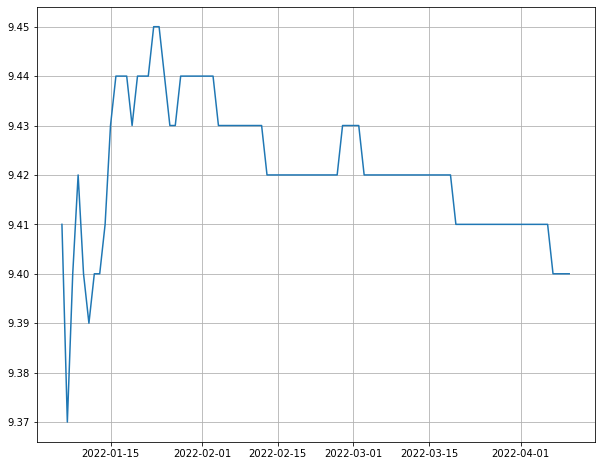

In [66]:
# 평점 변화 그래프
# 시계열 데이터이므로 line 그래프

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(tmp['날짜'],tmp['영화평점'])
plt.grid()
plt.show()

In [68]:
movie_df.head()

,날짜,영화제목,영화평점
0,2022-01-01,코다,9.24
1,2022-01-01,스파이더맨: 노 웨이 홈,8.97
2,2022-01-01,러브 액츄얼리,8.93
3,2022-01-01,아멜리에,8.81
4,2022-01-01,고양이를 부탁해,8.81


In [69]:
# 데이터 재배치 - 피봇테이블 사용(long-wide)
# 날짜별 영화의 point를 확인
# index=날짜, column = 영화제목, values = 영화평점 
movie_pivot = pd.pivot_table(movie_df,
                            index = ['날짜'],
                            columns=['영화제목'],
                            values=['영화평점'])

In [72]:
movie_pivot.shape

(100, 95)

In [74]:
movie_pivot.head()

영화평점                                                                \
영화제목        355 가나의 혼인잔치: 언약 경관의 피 고양이를 부탁해 공각기동대 광대: 소리꾼  귀향 그녀에게 극장판 주술회전 0   
날짜                                                                              
2022-01-01  NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN   
2022-01-02  NaN          NaN   NaN      NaN  8.73     NaN NaN  NaN        NaN   
2022-01-03  NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN   
2022-01-04  NaN          NaN   NaN     8.81  8.73     NaN NaN  NaN        NaN   
2022-01-05  NaN          NaN  8.18     8.81  8.73     NaN NaN  NaN        NaN   

                     ...                                             \
영화제목       기쿠지로의 여름  ... 프렌치 디스패치 하나-비 하우스 오브 구찌 한공주 해리 포터와 불사조 기사단   
날짜                   ...                                              
2022-01-01      NaN  ...     8.02  NaN       NaN NaN            NaN   
2022-01-02      NaN  ...     8.02  NaN       NaN NaN            NaN   
2022-01-03      NaN  ...     8.01  NaN       NaN NaN            NaN   
2022-01-04      NaN  ...     8.01  NaN       NaN NaN            NaN   
2022-01-05      NaN  ...     8.01  NaN       NaN NaN            NaN   

                                                 
영화제목       해적: 도깨비 깃발 해피 뉴 이어 해피 투게더 화양연화 환상의 빛  
날짜                                               
2022-01-01        NaN    7.21    NaN  NaN   NaN  
2022-01-02        NaN    7.14    NaN  NaN   NaN  
2022-01-03        NaN    7.11    NaN  NaN   NaN  
2022-01-04        NaN    7.08    NaN  NaN   NaN  
2022-01-05        NaN    7.10    NaN  NaN   NaN  

[5 rows x 95 columns]

In [77]:
# 피봇테이블 구성중에 멀티 인덱스로 구성 되었음
# 최상위 인덱스(영화 평점)
# 멀티인덱스 제거 
# df.columns.droplevel()
movie_pivot.columns = movie_pivot.columns.droplevel()

In [78]:
movie_pivot.head()

영화제목,355,가나의 혼인잔치: 언약,경관의 피,고양이를 부탁해,공각기동대,광대: 소리꾼,귀향,그녀에게,극장판 주술회전 0,기쿠지로의 여름,...,프렌치 디스패치,하나-비,하우스 오브 구찌,한공주,해리 포터와 불사조 기사단,해적: 도깨비 깃발,해피 뉴 이어,해피 투게더,화양연화,환상의 빛
날짜,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.02,NaN,NaN,NaN,NaN,NaN,7.21,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,8.73,NaN,NaN,NaN,NaN,NaN,...,8.02,NaN,NaN,NaN,NaN,NaN,7.14,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.11,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.08,NaN,NaN,NaN
2022-01-05,NaN,NaN,8.18,8.81,8.73,NaN,NaN,NaN,NaN,NaN,...,8.01,NaN,NaN,NaN,NaN,NaN,7.10,NaN,NaN,NaN


In [80]:
# 평점의 합이 높은 영화 5개의 평점 변화 확인 
movie_top.head(5)

,영화평점
영화제목,
씽2게더,894.97
스파이더맨: 노 웨이 홈,887.49
드라이브 마이 카,812.60
코다,690.29
킹메이커,556.85


In [81]:
sel_col = movie_top.head(5).index
sel_col

Index(['씽2게더', '스파이더맨: 노 웨이 홈', '드라이브 마이 카', '코다', '킹메이커'], dtype='object', name='영화제목')

In [82]:
## 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [83]:
movie_pivot[sel_col]

영화제목,씽2게더,스파이더맨: 노 웨이 홈,드라이브 마이 카,코다,킹메이커
날짜,,,,,
2022-01-01,NaN,8.97,NaN,9.24,NaN
2022-01-02,NaN,8.96,NaN,9.24,NaN
2022-01-03,NaN,8.95,NaN,9.24,NaN
2022-01-04,NaN,8.95,NaN,9.23,NaN
2022-01-05,NaN,8.95,NaN,9.23,NaN
...,...,...,...,...,...
2022-04-06,9.41,8.82,8.44,9.15,7.28
2022-04-07,9.40,8.82,8.44,9.15,7.28
2022-04-08,9.40,8.82,8.44,9.14,7.28


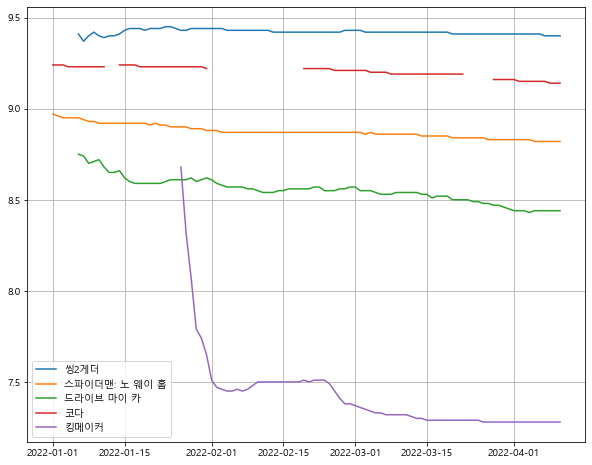

In [84]:
plt.figure(figsize=(10,8))
plt.plot(movie_pivot[sel_col])
plt.legend(sel_col,loc='best')
plt.grid()
plt.show()